# CNN Image Classification Laboration


Images used in this laboration are from CIFAR 10 (https://en.wikipedia.org/wiki/CIFAR-10). The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class. Your task is to make a classifier, using a convolutional neural network, that can correctly classify each image into the correct class.

You need to answer all questions in this notebook. 

## Part 1: What is a convolution

To understand a bit more about convolutions, we will first test the convolution function in scipy using a number of classical filters. 

Convolve the image with Gaussian filter, a Sobel X filter, and a Sobel Y filter, using the function 'convolve2d' in 'signal' from scipy.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html

In a CNN, many filters are applied in each layer, and the filter coefficients are learned through back propagation (which is in contrast to traditional image processing, where the filters are designed by an expert).

In [2]:
# This cell is finished

from scipy import signal
import numpy as np

# Get a test image
from scipy import misc
image = misc.ascent()

# Define a help function for creating a Gaussian filter
def matlab_style_gauss2D(shape=(3,3),sigma=0.5):
    """
    2D gaussian mask - should give the same result as MATLAB's
    fspecial('gaussian',[shape],[sigma])
    """
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

# Create Gaussian filter with certain size and standard deviation
gaussFilter = matlab_style_gauss2D((15,15),4)

# Define filter kernels for SobelX and Sobely
sobelX = np.array([[ 1, 0,  -1],
                    [2, 0, -2],
                    [1, 0, -1]]) 

sobelY = np.array([[ 1, 2,  1],
                    [0, 0, 0],
                    [-1, -2, -1]]) 

In [3]:
# Perform convolution using the function 'convolve2d' for the different filters
filterResponseGauss = signal.convolve2d(image,gaussFilter, mode='same')
filterResponseSobelX=signal.convolve2d(image,sobelX , mode='same')
filterResponseSobelY =signal.convolve2d(image,sobelY, mode='same') 


# Perform convolution using the function 'convolve2d' for the different filters
#filterResponseGauss_v = signal.convolve2d(image,gaussFilter, mode='valid')
#filterResponseSobelX_v =signal.convolve2d(image,sobelX , mode='valid')
#filterResponseSobelY_v =signal.convolve2d(image,sobelY, mode='valid') 

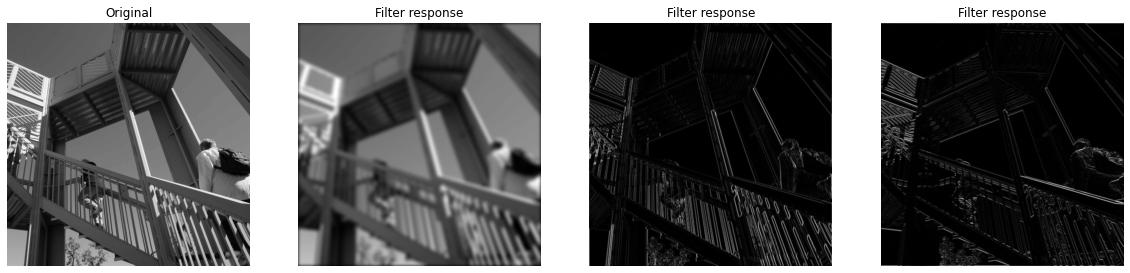

In [4]:
import matplotlib.pyplot as plt

# Show filter responses
fig, (ax_orig, ax_filt1, ax_filt2, ax_filt3) = plt.subplots(1, 4, figsize=(20, 6))
ax_orig.imshow(image, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_filt1.imshow(np.absolute(filterResponseGauss), cmap='gray')
ax_filt1.set_title('Filter response')
ax_filt1.set_axis_off()
ax_filt2.imshow(np.absolute(filterResponseSobelX), cmap='gray')
ax_filt2.set_title('Filter response')
ax_filt2.set_axis_off()
ax_filt3.imshow(np.absolute(filterResponseSobelY), cmap='gray')
ax_filt3.set_title('Filter response')
ax_filt3.set_axis_off()

##  Part 2: Understanding convolutions

Question 1: What do the 3 different filters (Gaussian, SobelX, SobelY) do to the original image?

Question 2: What is the size of the original image? How many channels does it have? How many channels does a color image normally have?

Question 3: What is the size of the different filters?

Question 4: What is the size of the filter response if mode 'same' is used for the convolution ?

Question 5: What is the size of the filter response if mode 'valid' is used for the convolution? How does the size of the valid filter response depend on the size of the filter? 

Question 6: Why are 'valid' convolutions a problem for CNNs with many layers?


Answer 1: The gaussian filter seems to be blurring the image. SobelX and SobelY filters are detecting horizontal and vertical edges in the image. 

Answer 2: Size of the all orginal images are printed below. It seems have the RGB channel. Normally as well we have an RGB channel

Answer 3: Size of different filters is 3x3

Answer 4:The output is in same size of input layer while we give filter response of mode "same"

Answer 5: If valid is used then the output image is smaller than the input image. This is because only the "valid" elements are counted and convolved. In the case of "same", there is some zero paddings at the top/bottom and left/right which makes the output image same size 

Answer 6: The image will grow smaller and smaller and might become too small at the end of all layers. 


In [5]:
# Your code for checking sizes of image and filter responses

print("Size of image {}".format(image.shape))
print("Size of image after gaussian filter {}".format(filterResponseGauss.shape))
print("Size of image after SobelX filter {}".format(filterResponseSobelX.shape))
print("Size of image after SobelX filter {}".format(filterResponseSobelY.shape))

#print("Size of image after gaussian filter with mode as same {}".format(filterResponseGauss_s.shape))
#print("Size of image after SobelX filter with mode as same{}".format(filterResponseSobelX_s.shape))
#print("Size of image after SobelX filter with mode as same{}".format(filterResponseSobelY_s.shape))


#print("Size of image after gaussian filter with mode as valid {}".format(filterResponseGauss_v.shape))
#print("Size of image after SobelX filter with mode as valid {}".format(filterResponseSobelX_v.shape))
#print("Size of image after SobelX filter with mode as valid {}".format(filterResponseSobelY_v.shape))


Size of image (512, 512)
Size of image after gaussian filter (512, 512)
Size of image after SobelX filter (512, 512)
Size of image after SobelX filter (512, 512)


##  Part 3: Get a graphics card

Skip this part if you run on a CPU

Let's make sure that our script can see the graphics card that will be used. The graphics cards will perform all the time consuming convolutions in every training iteration.

In [6]:
import os
import warnings

# Ignore FutureWarning from numpy
warnings.simplefilter(action='ignore', category=FutureWarning)

import keras.backend as K
import tensorflow as tf

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
 
# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="0";

# Allow growth of GPU memory, otherwise it will always look like all the memory is being used
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True) 

IndexError: list index out of range

##  Part 4: How fast is the graphics card?

Question 7: Why are the filters of size 7 x 7 x 3, and not 7 x 7 ? 

Question 8: What operation is performed by the 'Conv2D' layer? Is it a standard 2D convolution, as performed by the function signal.convolve2d we just tested?

Lets investigate how much faster a convolution is with the graphics card (skip this part if you run on a CPU)

Question 9: How much faster is the graphics card, compared to the CPU, for convolving a batch of 100 images?

Question 10: How much faster is the graphics card, compared to the CPU, for convolving a batch of 2 images? Explain the difference compared to 100 images.

Answer 7: The last dimension represents the number of channels. Here, we have three channels and therfore one image is actually 3 images. If the input has 3 channels, so should the filter. Number of channels is also referred to as Depth. 

Answer 8: The Conv2D is filtering the image with convolution layer, the layer is undergoes the lot of filters to learn image with the help of previous layer. Yes it does the same function as signal.convolve2D

In [7]:
# Run this cell to compare processing time of CPU and GPU

import timeit

n_images_in_batch = 100
 
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
    raise SystemError('GPU device not found')

# Perform convolutions using the CPU
def cpu():
    with tf.device('/cpu:0'):
        random_images = tf.random.normal((n_images_in_batch, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_images)
    return tf.math.reduce_sum(net_cpu)

# Perform convolutions using the GPU (graphics card)
def gpu():
    with tf.device('/device:GPU:0'):
        random_images = tf.random.normal((n_images_in_batch, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_images)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the convolution several times and measure the time
print('Time (s) to convolve 32 filters of size 7 x 7 x 3 over 100 random images of size 100 x 100 x 3'
      ' (batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))



This error most likely means that this notebook is not configured to use a GPU.  Change this in Notebook Settings via the command palette (cmd/ctrl-shift-P) or the Edit menu.




SystemError: GPU device not found

##  Part 5:  Load data
Time to make a 2D CNN. Load the images and labels from keras.datasets, this cell is already finished.

In [8]:
from keras.datasets import cifar10
import numpy as np

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Download CIFAR train and test data
(Xtrain, Ytrain), (Xtest, Ytest) = cifar10.load_data()

print("Training images have size {} and labels have size {} ".format(Xtrain.shape, Ytrain.shape))
print("Test images have size {} and labels have size {} \n ".format(Xtest.shape, Ytest.shape))

# Reduce the number of images for training and testing to 10000 and 2000 respectively, 
# to reduce processing time for this laboration
Xtrain = Xtrain[0:10000]
Ytrain = Ytrain[0:10000]

Xtest = Xtest[0:2000]
Ytest = Ytest[0:2000]

Ytestint = Ytest

print("Reduced training images have size %s and labels have size %s " % (Xtrain.shape, Ytrain.shape))
print("Reduced test images have size %s and labels have size %s \n" % (Xtest.shape, Ytest.shape))

# Check that we have some training examples from each class
for i in range(10):
    print("Number of training examples for class {} is {}" .format(i,np.sum(Ytrain == i)))

Training images have size (50000, 32, 32, 3) and labels have size (50000, 1) 
Test images have size (10000, 32, 32, 3) and labels have size (10000, 1) 
 
Reduced training images have size (10000, 32, 32, 3) and labels have size (10000, 1) 
Reduced test images have size (2000, 32, 32, 3) and labels have size (2000, 1) 

Number of training examples for class 0 is 1005
Number of training examples for class 1 is 974
Number of training examples for class 2 is 1032
Number of training examples for class 3 is 1016
Number of training examples for class 4 is 999
Number of training examples for class 5 is 937
Number of training examples for class 6 is 1030
Number of training examples for class 7 is 1001
Number of training examples for class 8 is 1025
Number of training examples for class 9 is 981


##  Part 6: Plotting

Lets look at some of the training examples, this cell is already finished. You will see different examples every time you run the cell.

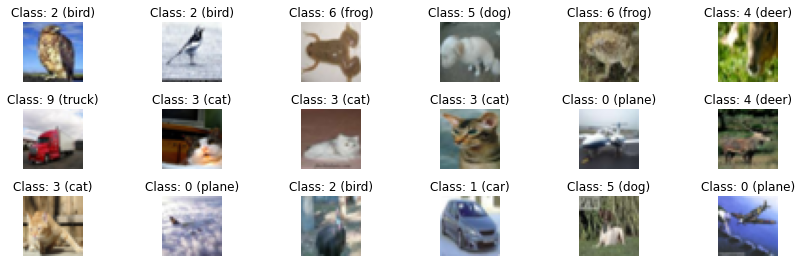

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
for i in range(18):
    idx = np.random.randint(7500)
    label = Ytrain[idx,0]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(Xtrain[idx])
    plt.title("Class: {} ({})".format(label, classes[label]))
    plt.axis('off')
plt.show()

##   Part 7: Split data into training, validation and testing
Split your training data into training (Xtrain, Ytrain) and validation (Xval, Yval), so that we have training, validation and test datasets (as in the previous laboration). We use a function in scikit learn. Use 25% of the data for validation.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [10]:
from sklearn.model_selection import train_test_split

Xtrain, Xval, Ytrain, Yval = train_test_split(Xtrain, Ytrain, test_size=0.25,random_state=0)

# Print the size of training data, validation data and test data
print("Size of the training data :{}".format(Xtrain.shape))
print("size of the labels for training data :{}".format(Ytrain.shape))
print("Size of the Validation data :{}".format(Xval.shape))
print("Size of the labels for validation data :{}".format(Yval.shape))
print("Size of the test data :{}".format(Xtest.shape))
print("Size of the labels for test data :{}".format(Ytest.shape))

Size of the training data :(7500, 32, 32, 3)
size of the labels for training data :(7500, 1)
Size of the Validation data :(2500, 32, 32, 3)
Size of the labels for validation data :(2500, 1)
Size of the test data :(2000, 32, 32, 3)
Size of the labels for test data :(2000, 1)


##  Part 8: Preprocessing of images

Lets perform some preprocessing. The images are stored as uint8, i.e. 8 bit unsigned integers, but need to be converted to 32 bit floats. We also make sure that the range is -1 to 1, instead of 0 - 255. This cell is already finished.

In [11]:


# Convert datatype for Xtrain, Xval, Xtest, to float32
Xtrain = Xtrain.astype('float32')
Xval = Xval.astype('float32')
Xtest = Xtest.astype('float32')

# Change range of pixel values to [-1,1]
Xtrain = Xtrain / 127.5 - 1
Xval = Xval / 127.5 - 1
Xtest = Xtest / 127.5 - 1

##  Part 9: Preprocessing of labels

The labels (Y) need to be converted from e.g. '4' to "hot encoded", i.e. to a vector of type [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] . We use a function in Keras, see https://keras.io/api/utils/python_utils/#to_categorical-function

In [12]:
from keras.utils import to_categorical

# Print shapes before converting the labels
print("Size of the Ytrain :{}".format(Ytrain.shape))
print("Size of the Yval :{}".format(Yval.shape))
print("Size of the Ytest :{}".format(Ytest.shape))

# Your code for converting Ytrain, Yval, Ytest to categorical
Ytrain_cat=to_categorical(Ytrain,dtype="int32")
Yval_cat=to_categorical(Yval,dtype="int32")
Ytest_cat=to_categorical(Ytest,dtype="int32")

# Print shapes after converting the labels
print("Size of the Ytrain :{}".format(Ytrain_cat.shape))
print("Size of the Yval :{}".format(Yval_cat.shape))
print("Size of the Ytest :{}".format(Ytest_cat.shape))

Size of the Ytrain :(7500, 1)
Size of the Yval :(2500, 1)
Size of the Ytest :(2000, 1)
Size of the Ytrain :(7500, 10)
Size of the Yval :(2500, 10)
Size of the Ytest :(2000, 10)


##  Part 10: 2D CNN
Finish this code to create the image classifier, using a 2D CNN. Each convolutional layer will contain 2D convolution, batch normalization and max pooling. After the convolutional layers comes a flatten layer and a number of intermediate dense layers. The convolutional layers should take the number of filters as an argument, use a kernel size of 3 x 3, 'same' padding, and relu activation functions. The number of filters will double with each convolutional layer. The max pooling layers should have a pool size of 2 x 2. The intermediate dense layers before the final dense layer should take the number of nodes as an argument, use relu activation functions, and be followed by batch normalization. The final dense layer should have 10 nodes (= the number of classes in this laboration) and 'softmax' activation. Here we start with the Adam optimizer.

Relevant functions are

`model.add()`, adds a layer to the network

`Dense()`, a dense network layer

`Conv2D()`, performs 2D convolutions with a number of filters with a certain size (e.g. 3 x 3). 

`BatchNormalization()`, perform batch normalization

`MaxPooling2D()`, saves the max for a given pool size, results in down sampling

`Flatten()`, flatten a multi-channel tensor into a long vector

`model.compile()`, compile the model, add " metrics=['accuracy'] " to print the classification accuracy during the training

See https://keras.io/api/layers/core_layers/dense/ and https://keras.io/api/layers/reshaping_layers/flatten/ for information on how the `Dense()` and `Flatten()` functions work

See https://keras.io/layers/convolutional/ for information on how `Conv2D()` works

See https://keras.io/layers/pooling/ for information on how `MaxPooling2D()` works

Import a relevant cost function for multi-class classification from keras.losses (https://keras.io/losses/)

See the following links for how to compile, train and evaluate the model

https://keras.io/api/models/model_training_apis/#compile-method

https://keras.io/api/models/model_training_apis/#fit-method

https://keras.io/api/models/model_training_apis/#evaluate-method

In [13]:
from keras.models import Sequential, Model
from keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy  as catCross

#https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/


# Set seed from random number generator, for better comparisons
from numpy.random import seed
seed(123)

def build_CNN(input_shape, n_conv_layers=2, n_filters=16, n_dense_layers=0, n_nodes=50, use_dropout=False,use_bn=True,learning_rate=0.01):

    # Setup a sequential model
    model = Sequential()

    # Add first convolutional layer to the model, requires input shape
    model.add( Conv2D(filters=n_filters, kernel_size = (3, 3),activation ='relu', input_shape = input_shape,padding = "same"))
    if use_bn is True:
            model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    
    # Add remaining convolutional layers to the model, the number of filters should increase a factor 2 for each layer
    for i in range(n_conv_layers-1):
        model.add( Conv2D(filters=n_filters*2**(i+1),kernel_size = (3, 3),activation ='relu', input_shape = input_shape,padding = "same"))
        if use_bn is True:
            model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2,2)))
    
    # Add flatten layer
    model.add(Flatten())
    
    # Add intermediate dense layers
    for i in range(n_dense_layers):
        model.add(Dense(n_nodes, activation = 'relu'))
        if use_bn is True:
            model.add(BatchNormalization())
        if use_dropout is True:
            model.add(Dropout(0.5))
            
    # Add final dense layer
    model.add(Dense(10, activation = 'softmax'))
   
    # Compile model
    optimise = Adam(lr=learning_rate)
    model.compile(loss=catCross, optimizer=optimise, metrics=['accuracy'])
    
    return model

In [14]:
# Lets define a help function for plotting the training results
import matplotlib.pyplot as plt
def plot_results(history):
    
    loss = history.history['loss']
    acc = history.history['accuracy']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_accuracy']
    
    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(loss)
    plt.plot(val_loss)
    plt.legend(['Training','Validation'])

    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(acc)
    plt.plot(val_acc)
    plt.legend(['Training','Validation'])

    plt.show()

## Part 11: Train 2D CNN

Time to train the 2D CNN, start with 2 convolutional layers, no intermediate dense layers, learning rate = 0.01. The first convolutional layer should have 16 filters (which means that the second convolutional layer will have 32 filters).

Relevant functions

`build_CNN`, the function we defined in Part 10, call it with the parameters you want to use

`model.fit()`, train the model with some training data

`model.evaluate()`, apply the trained model to some test data

See the following links for how to train and evaluate the model

https://keras.io/api/models/model_training_apis/#fit-method

https://keras.io/api/models/model_training_apis/#evaluate-method

## 2 convolutional layers, no intermediate dense layers

In [15]:
Xtrain.shape[1:4]

(32, 32, 3)

In [16]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:4]

# Build model
model1 = build_CNN(input_shape, n_conv_layers=2, n_filters=16, n_dense_layers=0, n_nodes=50, use_dropout=False, learning_rate=0.01)

# Train the model  using training data and validation data
history1 = model1.fit(Xtrain,Ytrain_cat, batch_size=batch_size,epochs=epochs, verbose=1, validation_data=(Xval,Yval_cat))


Epoch 1/20
75/75 [==============================] - 10s 122ms/step - loss: 3.5397 - accuracy: 0.2673 - val_loss: 2.0661 - val_accuracy: 0.3264
Epoch 2/20
75/75 [==============================] - 8s 112ms/step - loss: 1.6297 - accuracy: 0.4700 - val_loss: 1.6070 - val_accuracy: 0.4276
Epoch 3/20
75/75 [==============================] - 9s 119ms/step - loss: 1.1901 - accuracy: 0.5879 - val_loss: 1.5360 - val_accuracy: 0.4428
Epoch 4/20
75/75 [==============================] - 9s 117ms/step - loss: 1.0666 - accuracy: 0.6237 - val_loss: 1.4710 - val_accuracy: 0.4892
Epoch 5/20
75/75 [==============================] - 9s 117ms/step - loss: 0.9689 - accuracy: 0.6563 - val_loss: 1.3237 - val_accuracy: 0.5404
Epoch 6/20
75/75 [==============================] - 8s 111ms/step - loss: 0.8591 - accuracy: 0.6988 - val_loss: 1.3277 - val_accuracy: 0.5360
Epoch 7/20
75/75 [==============================] - 9s 116ms/step - loss: 0.7803 - accuracy: 0.7253 - val_loss: 1.4280 - val_accuracy: 0.5460
Epoch

In [17]:
# Evaluate the trained model on test set, not used in training or validation
score = model1.evaluate(Xtest, Ytest_cat, verbose=1)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 1s 7ms/step - loss: 2.7011 - accuracy: 0.5630
Test loss: 2.7011
Test accuracy: 0.5630


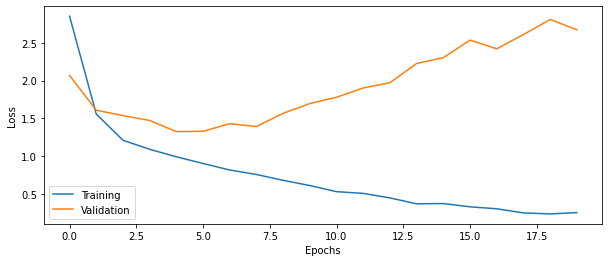

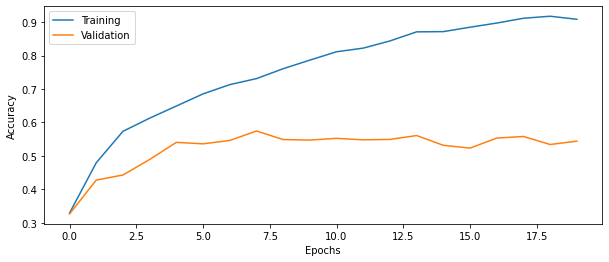

In [18]:
# Plot the history from the training run
plot_results(history1)

## Part 12: Improving performance

Skip question 12 if you run on a CPU

Write down the test accuracy, are you satisfied with the classifier performance (random chance is 10%) ? 

Question 11: How big is the difference between training and test accuracy?

Question 12: How busy is the GPU for a batch size of 100? How much GPU memory is used? Hint: run 'watch nvidia-smi' on the cloud computer during training. 

Question 13: For the DNN laboration we used a batch size of 10,000, why do we need to use a smaller batch size in this laboration?

Answer 11: Our Training Accuracy is close to 93%, but our test accuracy is close to 54% . Therefore the difference is 39%


Answer 13: Smaller Batch_size also has a huge amount of data because of the convolutional layers and all the filters through these convolutional layers

## 2 convolutional layers, 1 intermediate dense layer (50 nodes)

In [19]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:4]

# Build model
model2 = build_CNN(input_shape, n_conv_layers=2, n_filters=16, n_dense_layers=1, n_nodes=50, use_dropout=False,use_bn=True, learning_rate=0.01)

# Train the model  using training data and validation data
history2 = model2.fit(Xtrain,Ytrain_cat, batch_size=batch_size,epochs=epochs, verbose=1, validation_data=(Xval,Yval_cat))

Epoch 1/20
75/75 [==============================] - 9s 107ms/step - loss: 1.9240 - accuracy: 0.3431 - val_loss: 1.9119 - val_accuracy: 0.3224
Epoch 2/20
75/75 [==============================] - 8s 110ms/step - loss: 1.2873 - accuracy: 0.5372 - val_loss: 2.0131 - val_accuracy: 0.3224
Epoch 3/20
75/75 [==============================] - 9s 116ms/step - loss: 1.0247 - accuracy: 0.6400 - val_loss: 1.4772 - val_accuracy: 0.5012
Epoch 4/20
75/75 [==============================] - 9s 116ms/step - loss: 0.8246 - accuracy: 0.7086 - val_loss: 1.4665 - val_accuracy: 0.5332
Epoch 5/20
75/75 [==============================] - 9s 127ms/step - loss: 0.6531 - accuracy: 0.7737 - val_loss: 1.6046 - val_accuracy: 0.5396
Epoch 6/20
75/75 [==============================] - 8s 107ms/step - loss: 0.4843 - accuracy: 0.8344 - val_loss: 1.9300 - val_accuracy: 0.5188
Epoch 7/20
75/75 [==============================] - 8s 105ms/step - loss: 0.3572 - accuracy: 0.8884 - val_loss: 1.7533 - val_accuracy: 0.5560
Epoch 

In [20]:
# Evaluate the trained model on test set, not used in training or validation
score = model2.evaluate(Xtest, Ytest_cat, verbose=1)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 1s 7ms/step - loss: 3.1617 - accuracy: 0.5665
Test loss: 3.1617
Test accuracy: 0.5665


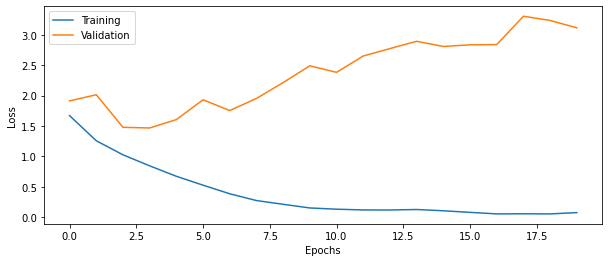

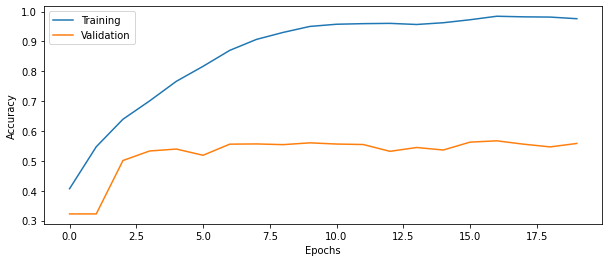

In [21]:
# Plot the history from the training run
plot_results(history2)

## 4 convolutional layers, 1 intermediate dense layer (50 nodes)

In [22]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:4]

# Build model
model3 = build_CNN(input_shape, n_conv_layers=4, n_filters=16, n_dense_layers=1, n_nodes=50, use_dropout=False,use_bn=True, learning_rate=0.01)

# Train the model  using training data and validation data
history3 = model3.fit(Xtrain,Ytrain_cat, batch_size=batch_size,epochs=epochs, verbose=1, validation_data=(Xval,Yval_cat))

Epoch 1/20
75/75 [==============================] - 12s 147ms/step - loss: 1.9801 - accuracy: 0.3141 - val_loss: 2.3079 - val_accuracy: 0.2656
Epoch 2/20
75/75 [==============================] - 9s 121ms/step - loss: 1.3479 - accuracy: 0.5144 - val_loss: 1.8881 - val_accuracy: 0.3592
Epoch 3/20
75/75 [==============================] - 9s 124ms/step - loss: 1.1410 - accuracy: 0.5923 - val_loss: 1.9013 - val_accuracy: 0.4140
Epoch 4/20
75/75 [==============================] - 9s 120ms/step - loss: 0.9624 - accuracy: 0.6547 - val_loss: 1.3372 - val_accuracy: 0.5444
Epoch 5/20
75/75 [==============================] - 9s 121ms/step - loss: 0.8164 - accuracy: 0.7090 - val_loss: 1.6300 - val_accuracy: 0.5592
Epoch 6/20
75/75 [==============================] - 9s 122ms/step - loss: 0.6446 - accuracy: 0.7650 - val_loss: 1.5860 - val_accuracy: 0.5664
Epoch 7/20
75/75 [==============================] - 9s 119ms/step - loss: 0.5082 - accuracy: 0.8247 - val_loss: 1.7342 - val_accuracy: 0.5604
Epoch

In [23]:
# Evaluate the trained model on test set, not used in training or validation
score = model3.evaluate(Xtest,Ytest_cat,verbose=1)
print('Test loss: %.4f'  % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 1s 10ms/step - loss: 2.5949 - accuracy: 0.5855
Test loss: 2.5949
Test accuracy: 0.5855


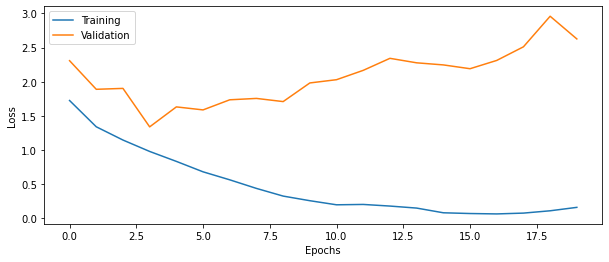

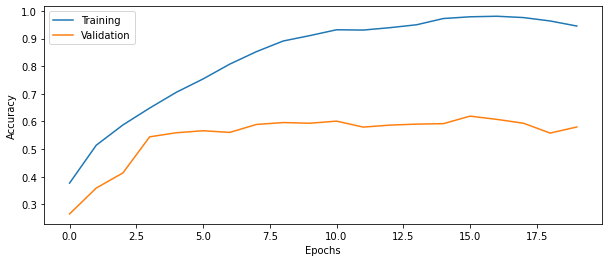

In [24]:
# Plot the history from the training run
plot_results(history3)

##  Part 13: Plot the CNN architecture

To understand your network better, print the architecture using `model.summary()`

Question 14: How many trainable parameters does your network have? Which part of the network contains most of the parameters?

Question 15: What is the input to and output of a Conv2D layer? What are the dimensions of the input and output? 

Question 16: Is the batch size always the first dimension of each 4D tensor? Check the documentation for Conv2D, https://keras.io/layers/convolutional/

Question 17: If a convolutional layer that contains 128 filters is applied to an input with 32 channels, what is the number of channels in the output?

Question 18: Why is the number of parameters in each Conv2D layer *not* equal to the number of filters times the number of filter coefficients per filter (plus biases)?

Question 19: How does MaxPooling help in reducing the number of parameters to train?

Answer 14: Number of trainable parameters are 124,180. conv2d_21 has the highest number of parameters as it the last convolutional layer.

Answer 15:The input layer and output layer is in the form of matrices ,where the dimension of the input is 32x32x3 (across 3 channels) and output is also of the same dimension. 

Answer 16: Yes, batch size is first dimension of each 4D tensor.

Answer 17: There will be 128 channels in the output. 

Answer 18: For the first Conv2D Layer, then number of parameters will be equal to (shape of filter x number of filters in previous layer (depth) + 1) x (number of filters). This will result in (9 * 3 + 1)* 16 = 448. For the second layer it will be (9* 16+1)* 32= 4640. And so on we can derive the number of parameters for each layer. 

Answer 19: It reduces the dimensionality of the images by reducing the number of pixels in the output from the previous convolution layer.Where it creates the downsampling of the image . For example: A pooling layer applied to a feature map of 6×6 (36 pixels) will result in an output pooled feature map of 3×3 (9 pixels).

In [25]:
# Print network architecture

model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
batch_normalization_6 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 64)         

##  Part 14: Dropout regularization

Add dropout regularization to each intermediate dense layer, dropout probability 50%.

Question 20: How much did the test accuracy improve with dropout, compared to without dropout?

Question 21: What other types of regularization can be applied? How can you add L2 regularization for the convolutional layers?


Answer 20: After using the Droput Regularization the test accuracy remained around the same as without dropout

Answer 21:We use only Dropout regularization, it can be add to our layer by using this command "kernel_regularizer=regularizers.l2(0.01)"

## 4 convolutional layers, 1 intermediate dense layer (50 nodes)

In [26]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:4]

# Build model
# Build model
model4 = build_CNN(input_shape, n_conv_layers=4, n_filters=16, n_dense_layers=1, n_nodes=50, use_dropout=True,use_bn=True, learning_rate=0.01)

# Train the model  using training data and validation data
history4 = model4.fit(Xtrain,Ytrain_cat, batch_size=batch_size,epochs=epochs, verbose=1, validation_data=(Xval,Yval_cat))

Epoch 1/20
75/75 [==============================] - 11s 136ms/step - loss: 2.3437 - accuracy: 0.2421 - val_loss: 2.1005 - val_accuracy: 0.2436
Epoch 2/20
75/75 [==============================] - 10s 138ms/step - loss: 1.5917 - accuracy: 0.4087 - val_loss: 1.8663 - val_accuracy: 0.3596
Epoch 3/20
75/75 [==============================] - 10s 130ms/step - loss: 1.4163 - accuracy: 0.4943 - val_loss: 1.4935 - val_accuracy: 0.4620
Epoch 4/20
75/75 [==============================] - 9s 123ms/step - loss: 1.2725 - accuracy: 0.5345 - val_loss: 1.3193 - val_accuracy: 0.5356
Epoch 5/20
75/75 [==============================] - 9s 125ms/step - loss: 1.1676 - accuracy: 0.5772 - val_loss: 1.2050 - val_accuracy: 0.5736
Epoch 6/20
75/75 [==============================] - 9s 123ms/step - loss: 1.0403 - accuracy: 0.6310 - val_loss: 1.4247 - val_accuracy: 0.5364
Epoch 7/20
75/75 [==============================] - 9s 122ms/step - loss: 0.9007 - accuracy: 0.6884 - val_loss: 1.2903 - val_accuracy: 0.5664
Epo

In [27]:
# Evaluate the trained model on test set, not used in training or validation
score = model4.evaluate(Xtest,Ytest_cat,verbose=1)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 1s 8ms/step - loss: 2.4130 - accuracy: 0.5965
Test loss: 2.4130
Test accuracy: 0.5965


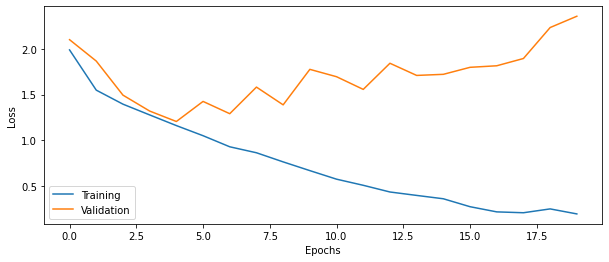

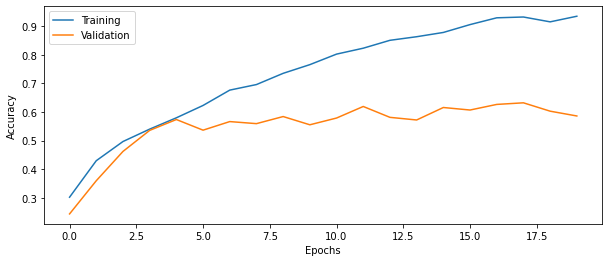

In [28]:
# Plot the history from the training run
plot_results(history4)

##  Part 15: Tweaking performance

You have now seen the basic building blocks of a 2D CNN. To further improve performance involves changing the number of convolutional layers, the number of filters per layer, the number of intermediate dense layers, the number of nodes in the intermediate dense layers, batch size, learning rate, number of epochs, etc. Spend some time (30 - 90 minutes) testing different settings.

Question 22: How high test accuracy can you obtain? What is your best configuration?

Answer 22: The best configuration and highest test accuracy are shown below.

## Your best config

In [29]:
from sklearn.utils import class_weight

batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:4]
#class_weight = class_weight.compute_class_weight("balanced", np.unique(Ytrain),Ytrain[:,0])

#class_weight = {0: 1.0,
 #              1: 2.0}
# Build model
model5 = build_CNN(input_shape, n_conv_layers=4, n_filters=16, n_dense_layers=1, n_nodes=50, use_dropout=True,use_bn=True, learning_rate=0.01)

# Train the model  using training data and validation data
history5 = model5.fit(Xtrain,Ytrain_cat, batch_size=batch_size,epochs=epochs, verbose=1, validation_data=(Xval,Yval_cat))

Epoch 1/20
75/75 [==============================] - 11s 123ms/step - loss: 2.2961 - accuracy: 0.2570 - val_loss: 1.8815 - val_accuracy: 0.2728
Epoch 2/20
75/75 [==============================] - 9s 119ms/step - loss: 1.5743 - accuracy: 0.4135 - val_loss: 2.1090 - val_accuracy: 0.2484
Epoch 3/20
75/75 [==============================] - 9s 119ms/step - loss: 1.3778 - accuracy: 0.4879 - val_loss: 1.6850 - val_accuracy: 0.3816
Epoch 4/20
75/75 [==============================] - 9s 115ms/step - loss: 1.2618 - accuracy: 0.5377 - val_loss: 1.6974 - val_accuracy: 0.4440
Epoch 5/20
75/75 [==============================] - 10s 130ms/step - loss: 1.1480 - accuracy: 0.5860 - val_loss: 1.4639 - val_accuracy: 0.5300
Epoch 6/20
75/75 [==============================] - 10s 128ms/step - loss: 1.0261 - accuracy: 0.6349 - val_loss: 1.3291 - val_accuracy: 0.5740
Epoch 7/20
75/75 [==============================] - 9s 121ms/step - loss: 0.9218 - accuracy: 0.6740 - val_loss: 1.2916 - val_accuracy: 0.5840
Epo

In [30]:
# Evaluate the trained model on test set, not used in training or validation
score = model5.evaluate(Xtest,Ytest_cat)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 1s 9ms/step - loss: 2.4715 - accuracy: 0.5870
Test loss: 2.4715
Test accuracy: 0.5870


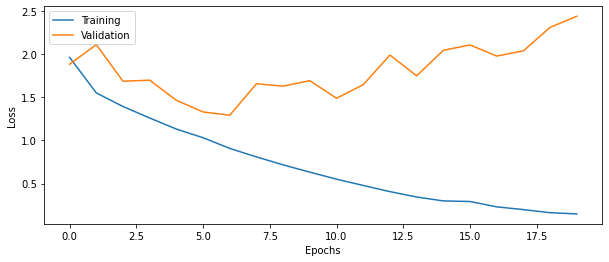

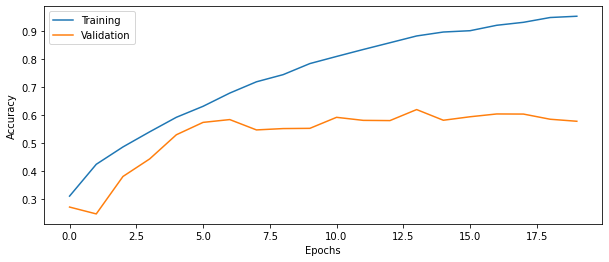

In [31]:
# Plot the history from the training run
plot_results(history5)

##  Part 16: Rotate the test images

How high is the test accuracy if we rotate the test images? In other words, how good is the CNN at generalizing to rotated images?

Rotate each test image 90 degrees, the cells are already finished.

Question 23: What is the test accuracy for rotated test images, compared to test images without rotation? Explain the difference in accuracy.

Answer 23: The test accuracy has decreased for the rotated images. This is because the model was trained on non-rotated images and then tested on rotated images. 

In [32]:
def myrotate(images):

    images_rot = np.rot90(images, axes=(1,2))
    
    return images_rot

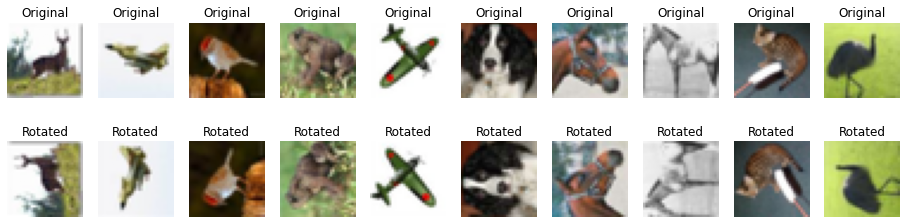

In [33]:
# Rotate the test images 90 degrees
Xtest_rotated = myrotate(Xtest)

# Look at some rotated images
plt.figure(figsize=(16,4))
for i in range(10):
    idx = np.random.randint(500)
    
    plt.subplot(2,10,i+1)
    plt.imshow(Xtest[idx]/2+0.5)
    plt.title("Original")
    plt.axis('off')
    
    plt.subplot(2,10,i+11)
    plt.imshow(Xtest_rotated[idx]/2+0.5)
    plt.title("Rotated")
    plt.axis('off')
plt.show()


In [34]:
# Evaluate the trained model on rotated test set
score = model5.evaluate(Xtest_rotated,Ytest_cat)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 1s 14ms/step - loss: 6.4596 - accuracy: 0.2255
Test loss: 6.4596
Test accuracy: 0.2255


##  Part 17: Augmentation using Keras `ImageDataGenerator`

We can increase the number of training images through data augmentation (we now ignore that CIFAR10 actually has 60 000 training images). Image augmentation is about creating similar images, by performing operations such as rotation, scaling, elastic deformations and flipping of existing images. This will prevent overfitting, especially if all the training images are in a certain orientation.

We will perform the augmentation on the fly, using a built-in function in Keras, called `ImageDataGenerator`

See https://keras.io/preprocessing/image/ , the `flow` method should be used

Do *NOT* use use_multiprocessing=True here, as it can cause strange errors.

In [35]:
# Get all 60 000 training images again. ImageDataGenerator manages validation data on its own
(Xtrain, Ytrain), _ = cifar10.load_data()

# Reduce number of images to 10,000
Xtrain = Xtrain[0:10000]
Ytrain = Ytrain[0:10000]

# Change data type and rescale range
Xtrain = Xtrain.astype('float32')
Xtrain = Xtrain / 127.5 - 1

# Convert labels to hot encoding
Ytrain = to_categorical(Ytrain, 10)

In [36]:
# Set up a data generator with on-the-fly data augmentation, 20% validation split
Xtrain, Xvalidation, Ytrain, Yvalidation = train_test_split(Xtrain, Ytrain,test_size=0.20, random_state=1,shuffle = True)

# Use a rotation range of 30 degrees, horizontal and vertical flipping
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=30, horizontal_flip=True,vertical_flip=True, validation_split=0.2)


batch_size=100

# Setup a flow for training data, assume that we can fit all images into CPU memory
training_data = datagen.flow(Xtrain, Ytrain, batch_size=batch_size)


# Setup a flow for validation data, assume that we can fit all images into CPU memory
validation_data = datagen.flow(Xvalidation, Yvalidation, batch_size=batch_size)

## Part 18: What about big data?

Question 24: How would you change the code for the image generator if you cannot fit all training images in CPU memory? What is the disadvantage of doing that change?

Answer 24:Dataset are splitted into batches and custom generator is used to load the data in a hardisk.

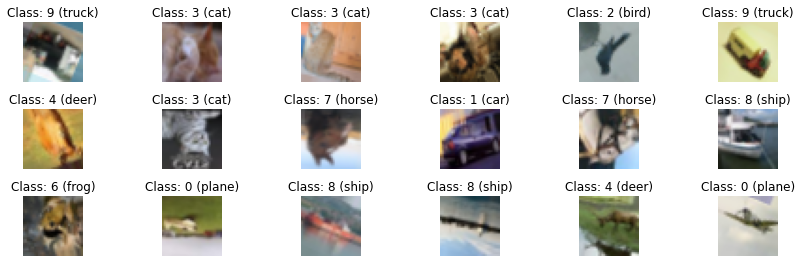

In [37]:
# Plot some augmented images
plot_datagen = datagen.flow(Xtrain, Ytrain, batch_size=1)

plt.figure(figsize=(12,4))
for i in range(18):
    (im, label) = plot_datagen.next()
    im = (im[0] + 1) * 127.5
    im = im.astype('int')
    label = np.flatnonzero(label)[0]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(im)
    plt.title("Class: {} ({})".format(label, classes[label]))
    plt.axis('off')
plt.show()

## Part 19: Train the CNN with images from the generator

See https://keras.io/api/models/model_training_apis/#fit-method for how to use model.fit with a generator instead of a fix dataset (numpy arrays)

To make the comparison fair to training without augmentation

    steps_per_epoch should be set to: len(Xtrain)*(1 - validation_split)/batch_size

    validation_steps should be set to: len(Xtrain)*validation_split/batch_size

Question 25: How quickly is the training accuracy increasing compared to without augmentation? Explain why there is a difference compared to without augmentation. What parameter is necessary to change to perform more training?

Question 26: What other types of image augmentation can be applied, compared to what we use here?

Answer 25: The training accuracy is increasing slower with augmentation than without. 

Answer 26: Flipping and cropping are other types of image augmentation that can be applied here. 

In [38]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:4]

# Build model (your best config)
model6 = build_CNN(input_shape, n_conv_layers=4, n_filters=16,n_dense_layers=2, n_nodes=50,learning_rate=0.01)

train_data_gen = datagen.flow(Xtrain, Ytrain, batch_size=batch_size)

validation_split=0.2

valid_data_gen = datagen.flow(Xtrain, Ytrain, batch_size=batch_size)

# Train the model using on the fly augmentation
history6 = model6.fit_generator(train_data_gen,validation_data=valid_data_gen,
                                steps_per_epoch=len(Xtrain)*(1 - validation_split)/batch_size,
                                epochs=epochs,
                                validation_steps=len(Xtrain)*validation_split/batch_size)

C:\Users\Mowniesh\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
64/64 [==============================] - 10s 136ms/step - loss: 2.2316 - accuracy: 0.2082 - val_loss: 2.1291 - val_accuracy: 0.2581
Epoch 2/20
64/64 [==============================] - 9s 136ms/step - loss: 1.7680 - accuracy: 0.3424 - val_loss: 2.2147 - val_accuracy: 0.2706
Epoch 3/20
64/64 [==============================] - 8s 130ms/step - loss: 1.6804 - accuracy: 0.3764 - val_loss: 1.7574 - val_accuracy: 0.3581
Epoch 4/20
64/64 [==============================] - 9s 141ms/step - loss: 1.5706 - accuracy: 0.4157 - val_loss: 2.0041 - val_accuracy: 0.3050
Epoch 5/20
64/64 [==============================] - 9s 142ms/step - loss: 1.5264 - accuracy: 0.4427 - val_loss: 1.6963 - val_accuracy: 0.4231
Epoch 6/20
64/64 [==============================] - 9s 136ms/step - loss: 1.4856 - accuracy: 0.4620 - val_loss: 1.6391 - val_accuracy: 0.4419
Epoch 7/20
64/64 [==============================] - 9s 137ms/step - loss: 1.4470 - accuracy: 0.4624 - val_loss: 1.8483 - val_accuracy: 0.3844
Epoch

In [39]:
# Check if there is still a big difference in accuracy for original and rotated test images

# Evaluate the trained model on original test set
score = model6.evaluate(Xtest, Ytest_cat, batch_size = batch_size, verbose=0)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

# Evaluate the trained model on rotated test set
score = model6.evaluate(Xtest_rotated, Ytest_cat, batch_size = batch_size, verbose=0)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

Test loss: 1.3219
Test accuracy: 0.5510
Test loss: 2.6563
Test accuracy: 0.2615


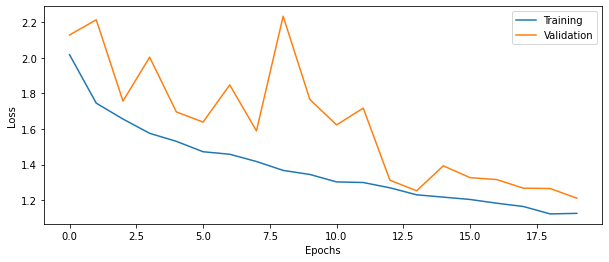

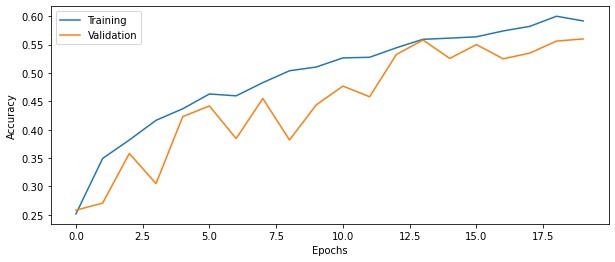

In [40]:
# Plot the history from the training run
plot_results(history6)

## Part 20: Plot misclassified images

Lets plot some images where the CNN performed badly, these cells are already finished.

In [41]:
# Find misclassified images
y_pred = model6.predict_classes(Xtest)
y_correct = np.argmax(Ytest_cat,axis=-1)

miss = np.flatnonzero(y_correct != y_pred)

C:\Users\Mowniesh\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


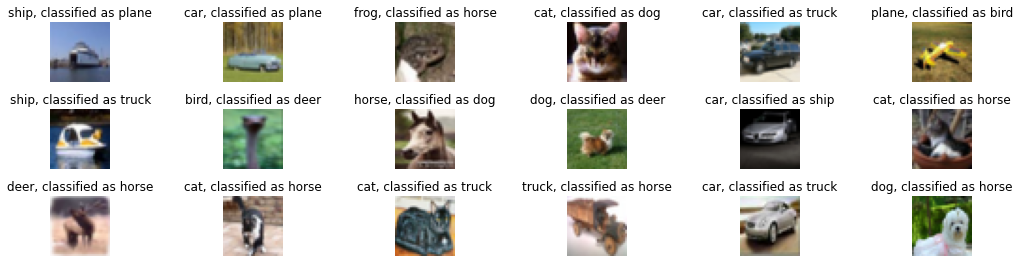

In [42]:
# Plot a few of them
plt.figure(figsize=(15,4))
perm = np.random.permutation(miss)
for i in range(18):
    im = (Xtest[perm[i]] + 1) * 127.5
    im = im.astype('int')
    label_correct = y_correct[perm[i]]
    label_pred = y_pred[perm[i]]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(im)
    plt.axis('off')
    plt.title("{}, classified as {}".format(classes[label_correct], classes[label_pred]))
plt.show()

##  Part 21: Testing on another size

Question 27: This CNN has been trained on 32 x 32 images, can it be applied to images of another size? If not, why is this the case?
Answer 27: No it cannot be as the input shape is 32 x 32 in the training dataset. 

Question 28: Is it possible to design a CNN that can be trained on images of one size, and then applied to an image of any size? How?

Answer 28: The image can be compressed or extended and then used for prediction.

##  Part 22: Pre-trained 2D CNNs

There are many deep 2D CNNs that have been pre-trained using the large ImageNet database (several million images, 1000 classes). Import a pre-trained ResNet50 network from Keras applications. Show the network using `model.summary()`

Question 29: How many convolutional layers does ResNet50 have? 

Question 30: How many trainable parameters does the ResNet50 network have? 

Question 31: What is the size of the images that ResNet50 expects as input?

Question 32: Using the answer to question 30, explain why the second derivative is seldom used when training deep networks.

Answer 29: There are 50 convolutional layers in ResNet50

Answer 30: There are close to 25 million trainable parameters in ResNet50

Answer 31: 224x224 

Answer 32: There are too many parameters and thus taking the second derivative may be computationally expensive. 

Apply the pre-trained CNN to 5 random color images that you download and copy to the cloud machine or your own computer. Are the predictions correct? How certain is the network of each image class?

These pre-trained networks can be fine tuned to your specific data, and normally only the last layers need to be re-trained, but it will still be too time consuming to do in this laboration.

See https://keras.io/api/applications/ and https://keras.io/api/applications/resnet/#resnet50-function 

Useful functions

`image.load_img` in keras.preprocessing

`image.img_to_array` in keras.preprocessing

`ResNet50` in keras.applications.resnet50

`preprocess_input` in keras.applications.resnet50

`decode_predictions` in keras.applications.resnet50

`expand_dims` in numpy


In [48]:
from keras.applications import ResNet50
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
import numpy as np
# Your code for using pre-trained ResNet 50 on 5 color images of your choice

model = ResNet50(weights="imagenet")

img_path = 'elephant.jpg'

img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)

decode = decode_predictions(features)
print(decode)



[[('n02504458', 'African_elephant', 0.620222), ('n01871265', 'tusker', 0.30680764), ('n02504013', 'Indian_elephant', 0.06532013), ('n02437312', 'Arabian_camel', 0.004385367), ('n02412080', 'ram', 0.0006333719)]]


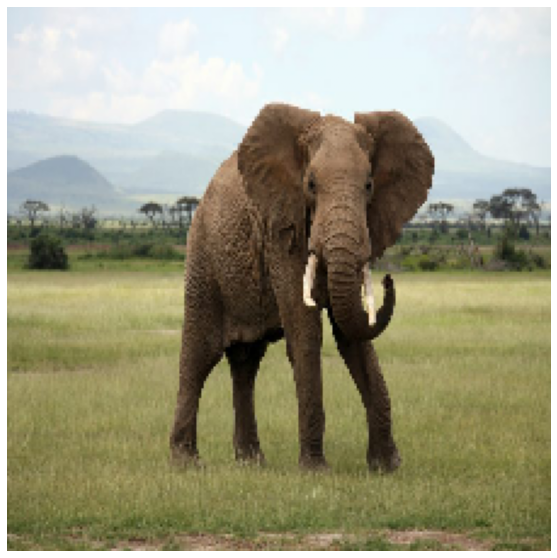

Predicted: [('n02504458', 'African_elephant', 0.620222), ('n01871265', 'tusker', 0.30680764), ('n02504013', 'Indian_elephant', 0.06532013)]


In [54]:
fig, ax = plt.subplots(1, figsize=(12, 10))
img_array = image.img_to_array(img)
ax.imshow(img_array / 255.)
ax.axis('off')

plt.show()
print('Predicted:', decode_predictions(features, top=3)[0])